In [1]:
import nltk
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [2]:
from nltk.tokenize import sent_tokenize, word_tokenize, regexp_tokenize
from nltk.corpus import stopwords
from collections import Counter
from spellchecker import SpellChecker

In [153]:
from lxml import html
import requests # modules for scraping html data from nltk page

In [3]:
import functions as van

In [4]:
# create the ls of ls as dataset
salientWords = van.readData("salientWords.txt")

# check to see if ls is same len after reading in data from doc
len(salientWords) == 3101

False

In [5]:
# document is not same length. extra item was thrown in. pop this item to remove it from list
salientWords.pop(3101)

['']

In [6]:
# check len again
len(salientWords) == 3101

True

# TFIDF

In [7]:
# the following code creates a dictionary called documentFrequency which determines the total use of 
# individual/unique words across *all* documents
documentIndex = {} 
for sentIndex, sent in enumerate(salientWords):
    for word_index, word in enumerate(sent):
        try:
            # checks to see if there is an existing index and, if there is & the value of the 
            # sentence doesn't already exist, it adds the value
            documentIndex[word].add(sentIndex)
        except:
            # if there is not an existing index, it creates one and *then* adds the value
            documentIndex[word] = {sentIndex}

# documentIndex dictionary is indexed by the unique word. each entry is the sentence (document) #

documentFrequency = {}

for dictIndex, dictElement in enumerate(documentIndex):
    documentFrequency[dictElement] = len(documentIndex[dictElement]) # add the number
    # of documents that contain this index (word) to the new dict.
    
# documentFrequency is a dictionary containing 'unique_word': howManySentencesItOccursIn

In [8]:
# calculate total documents/sent
totalDocuments = len(salientWords)
print("There are %d total documents/sentences in the book"%(totalDocuments))

# calculate total words
wordLen = 0
for i,e in enumerate(salientWords):
    wordLen += len(e)
print("After the data was cleaned and processed there were %d total words remaining"%(wordLen))

There are 3101 total documents/sentences in the book
After the data was cleaned and processed there were 30970 total words remaining


In [9]:
termFrequencyLs = [] # create ls for term frequency (TF)
inverseDocFrequencyLs = [] # create ls for inverse document frequency (IDF)
tfidfLs = [] # create ls for term frequency-inverse document frequency (TF-IDF)
for sent_index, sent in enumerate(salientWords): # loop through each document
    # create a sep list for each document's stats
    tempTermFrequency = [] 
    tempInverseDocFrequency = []
    tempTfidf = []
    docLength = len(sent) # length of the current document (how many words in this sentence)
    counts = Counter(sent) # create a counter for unique values and their frequency per document
    for word_index, word in enumerate(sent): # iterate through each word in the current document
        frequencyInDoc = counts[word] # frequency of current word
        termFrequency = frequencyInDoc / docLength # term frequency for this word in this doc
        tempTermFrequency.append(termFrequency) 
        
        
        inverseDocFrequency = math.log((totalDocuments/(documentFrequency[word]))) # inverse doc
        # frequency for this word in this doc
        tempInverseDocFrequency.append(inverseDocFrequency)
        
        tfidf = (termFrequency * inverseDocFrequency) #tfidf for this word in this doc
        tempTfidf.append(tfidf)
    
    # append the list of the current document to the big-boy list
    termFrequencyLs.append(tempTermFrequency)
    inverseDocFrequencyLs.append(tempInverseDocFrequency)
    tfidfLs.append(tempTfidf)

In [82]:
## interesting. The following prints the top three TFIDF value for each document (i.e. sentence)
## SUPER INTERESTING. THE CODE BELOW GIVES A LOT OF MEANING IN THREE WORDS PER SENTENCE.
maximumIndexLs = []

for index, ls in enumerate(tfidfLs):
    #maximumIndex = np.argmax(ls)
    #maximumIndexLs.append(maximumIndex)
    #topThree = []
    n = 3
    topThreeIndeces = sorted(range(len(ls)), key = lambda sub: ls[sub])[-n:] # some crazy ass lambda function I found that grabs the indecies of the
    # three largest items. if someone can explain to me how this is working that would be lovely. all i know is that it works!
    # print(topThreeIndeces)
    maximumIndexLs.append(topThreeIndeces)
        
sentenceNum = []
wordOne = []
wordTwo = []
wordThree = []
if len(maximumIndexLs) == len(salientWords): # check to make sure we can iterate over these together
    for index, doc in enumerate(salientWords):
        #print("Sentence # %d: "%(index))
        indexLs = maximumIndexLs[index]
        if len(indexLs) ==3: 
            sentenceNum.append((index + 1))
            for j in range(3):
                tempWord = doc[(indexLs[j])]
                #print("Word %d: %s"%((j+1), tempWord))
                if j == 0:
                    wordOne.append(tempWord)
                elif j == 1:
                    wordTwo.append(tempWord)
                elif j == 2:
                    wordThree.append(tempWord)
        else:
            #print("Wrong number of maximums")
            sentenceNum.append((index+1))
            if len(indexLs) > 0:
                for j in range(len(indexLs)):
                    if j == 0:
                        wordOne.append(tempWord)
                    elif j == 1:
                        wordTwo.append(tempWord)
                        
else:
    print("Not same length.")

In [104]:
# make a dataframe with the top three words for each sentence
topThreeWords = pd.DataFrame(zip(sentenceNum,wordOne,wordTwo,wordThree), columns = ["sentenceNum", "wordOne", "wordTwo", "wordThree"])
topThreeWords[100:110]

,sentenceNum,wordOne,wordTwo,wordThree
100,101,fiesty,endless,shooed
101,102,expedition,twenty,drift
102,103,four,forgotten,dab
103,104,turn,pasta,shade
104,105,ragu,waited,symmetrical
105,106,walk,smack,rested
106,107,juniper,shade,vista
107,108,cows,classroom,panick
108,109,drawn,smoldering,would
109,110,west,distant,truth


In [84]:
# create a set of random pointers to filter out the word sets
random.seed(120)
pointers = []

for i in range(10):
    ptr = random.randint(0, len(sentenceNum))
    pointers.append(ptr)
    
print(pointers)

[2109, 1015, 772, 2602, 3005, 2415, 2748, 1894, 373, 1290]


In [85]:
# filter out the df according to the pointer and the length of sentences. append each df to a list
length = 3
sets = []

for index, ptr in enumerate(pointers):
    cap = ptr + length # cap is the top index in DataFrame[ptr:cap]
    tempDf = topThreeWords[ptr:cap]
    sets.append(tempDf)
    filePath = "randomSamples/randomSet" + str(index) + ".csv"
    tempDf.to_csv(filePath)
     
sets[2] # one is interestin

,sentenceNum,wordOne,wordTwo,wordThree
772,773,choice,simultameous,wants
773,774,wherever,crazy,jonathan
774,775,home,body,growing


# Word Frequency

In [88]:
# although we already put this through a dict above, I would rather use lists
allSalientWords = []

for sentIndex, sent in enumerate(salientWords):
    for wordIndex, word in enumerate(sent):
        allSalientWords.append(word)

len(allSalientWords)
("van" in allSalientWords) # so the word van is in salient words, so it got lost somewhere in the next two cells

True

In [103]:
allSalientWordsArr = uniqueArr(allSalientWords)
allSalientWordsDf = uniqueDf(allSalientWordsArr)
allSalientWordsDf.head(10) # so if i just let it chill like this it's all good

,token,indexFirstTokenOccur,frequency
3211,like,376,211
5866,van,280,163
429,back,262,159
4668,said,29,158
5592,time,64,157
3802,one,32,144
6120,would,193,137
4588,road,551,129
2688,home,67,122
3194,life,127,121


In [100]:
altAxis = allSalientWordsArr.transpose()


posTuples = nltk.pos_tag(altAxis[0])
posLs = []

for i in range(len(posTuples)):
    tup = posTuples[i]
    pos = tup[1]
    posLs.append(pos)
#posLs

posArr = np.array([posLs])

In [94]:
if len(allSalientWordsArr) == len(posLs):
    final = np.hstack([allSalientWordsArr, posArr.T])
else:
    print("no")

In [101]:
finalDf = pd.DataFrame(final, columns = ["word", "index", "frequency", "type"])

In [149]:
posFrequency = finalDf.groupby(["type"]).count()["word"] # group by part of speech tags and count values for each
posFrequencyShort = pd.DataFrame((posFrequency[posFrequency >= 50])).reset_index()
posFrequencyShort

,type,word
0,CD,107
1,JJ,1146
2,NN,1886
3,NNS,886
4,RB,304
5,VBD,502
6,VBG,463
7,VBN,218
8,VBP,392
9,VBZ,96


In [150]:
posTags = ["CD", "JJ", "NN", "NNS", "RB", "VBD", "VBG", "VBN", "VBP", "VBZ"]

<BarContainer object of 10 artists>

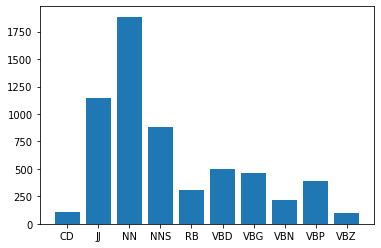

In [146]:
plt.bar(posFrequencyShort["type"], posFrequencyShort["word"])

In [195]:
codePage = requests.get("http://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html")
pageTree = html.fromstring(codePage.content)
table = pageTree.xpath("//table") #get table
obj = pd.read_html(codePage.content)
obj = obj[0]
obj

,0,1,2
0,Number,Tag,Description
1,1.,CC,Coordinating conjunction
2,2.,CD,Cardinal number
3,3.,DT,Determiner
4,4.,EX,Existential there
5,5.,FW,Foreign word
6,6.,IN,Preposition or subordinating conjunction
7,7.,JJ,Adjective
8,8.,JJR,"Adjective, comparative"
9,9.,JJS,"Adjective, superlative"
